In [1]:
import math
import pandas as pd
import numpy as np
from datetime import datetime
import statistics

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

In [4]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\plain_arf_vavel.txt', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210606\cluster_rel_rf_vavel.txt'
]
labels = [
    'no_feature_extraction',
    'cluster_aggregation'
]

In [3]:
def generate_graph(yname, figname, labels, frames, is_relative= False, 
                   print_result=False, xname = 'learning evaluation instances', ynamelabel = '' , xnamelabel = 'Events' ):
    plt.clf()
       
    result = {}

    index = 0
    for frame in frames:
        y = frame[yname] / frames[0][yname] if is_relative else frame[yname]
        plt.plot(frame[xname],y)
        result[labels[index]] = ("{:.2f}".format(np.mean(y)), "{:.2f}".format(np.std(y)))
        index += 1
    plt.xlabel(xnamelabel)
    plt.ylabel(ynamelabel if ynamelabel != '' else 'relative ' + yname if is_relative else yname)
    plt.legend(labels)
    plt.savefig(figname)
    
    return result 

    if print_result:
        print(result)
import pathlib    
def generate_matplotlib_graphs(paths, labels, filename):
    path= "/".join(filename.split("/")[:-1])
    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
    frames = []
    for tup in zip(paths,labels):
        frames.append(pd.read_csv(tup[0], sep = ','))
    

    
    mae = generate_graph('mean absolute error', f'{filename}_mae.png', labels, frames, print_result=True, ynamelabel= 'Mean absolute error')
    generate_graph('mean absolute error', f'{filename}_mae_rel.png', labels, frames, is_relative=True, ynamelabel= 'Relative mean absolute error')
    rmse = generate_graph('root mean squared error', f'{filename}_rmse.png', labels, frames, print_result=True, ynamelabel= 'Root mean squared error')
    generate_graph('root mean squared error', f'{filename}_rmse_rel.png', labels, frames, is_relative=True, ynamelabel= 'Relative root mean squared error')

    generate_graph('model cost (RAM-Hours)', f'{filename}_ram.png', labels, frames, ynamelabel= 'Model cost [RAM-Hours]')
    generate_graph('evaluation time (cpu seconds)', f'{filename}_time.png', labels, frames, ynamelabel= 'Evaluation time [CPU seconds]')
    generate_graph('model serialized size (bytes)', f'{filename}_size.png', labels, frames, ynamelabel= 'Model serialized size [bytes]')

    
    for label in mae:
        escaped_label = label.replace("_","\\_")
#         print(f'{escaped_label} & {mae[label][0]}({mae[label][1]}) & {rmse[label][0]}({rmse[label][1]})\\\\')
        print(f'{escaped_label} & {mae[label][0]} & {rmse[label][0]}\\\\')

In [20]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\standard\functions.AdaGrad.csv', 


]
labels = [
    'AdaGrad',

]

AdaGrad & 16772.16 & 123384.31\\


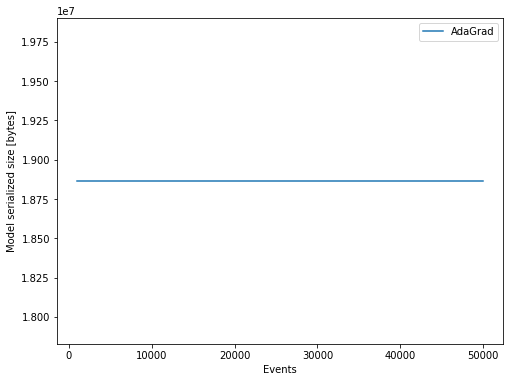

In [23]:
generate_matplotlib_graphs(paths, labels, './plots/20210916/vavel_sup_final')

In [5]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210906\vavel_sup\ARF.txt', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\standard\meta.AdaptiveRandomForestRegressor-s10-m80.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
        r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_40.csv', 


]
labels = [
    'No feature extraction',
    'No feature extraction slim',
    'Cluster aggregation',
        'Concatenated feature aggregation',
    'Complex event aggregation',

]

No feature extraction & 50.00 & 139.88\\
No feature extraction slim & 48.28 & 136.77\\
Cluster aggregation & 46.58 & 134.55\\
Concatenated feature aggregation & 48.46 & 137.75\\
Complex event aggregation & 46.07 & 131.94\\


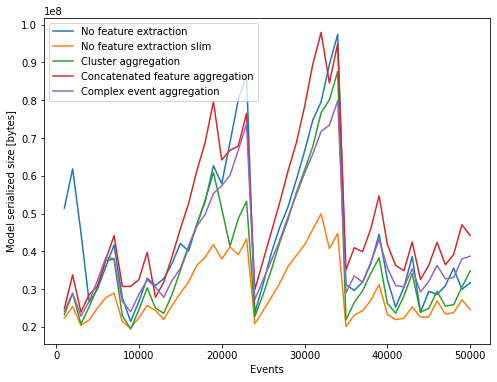

In [7]:
generate_matplotlib_graphs(paths, labels, './plots/20210921/vavel_sup_final')

In [8]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210906\vavel_sup\ARF.txt', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\standard\meta.AdaptiveRandomForestRegressor-s10-m80.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_28_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 


]
labels = [
    'No feature extraction',
    'No feature extraction slim',
    'Cluster aggregation'
]

No feature extraction & 50.00 & 139.88\\
No feature extraction slim & 48.28 & 136.77\\
Cluster aggregation & 47.74 & 136.81\\


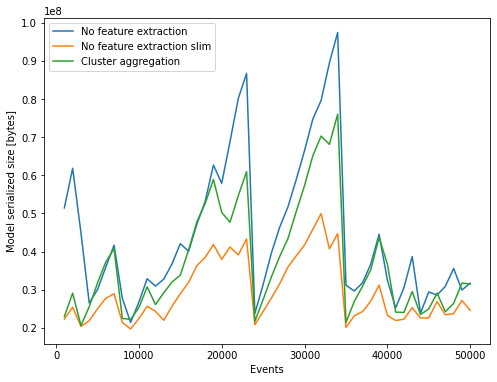

In [9]:
generate_matplotlib_graphs(paths, labels, './plots/20210921/vavel')

In [8]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_1_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_18_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_28_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_43_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 


]
labels = [
    '1',
    '5',
    '18',
    '28',
    '43'
]

1 & 48.15 & 137.64\\
5 & 46.58 & 134.55\\
18 & 48.09 & 136.35\\
28 & 47.74 & 136.81\\
43 & 47.98 & 137.13\\


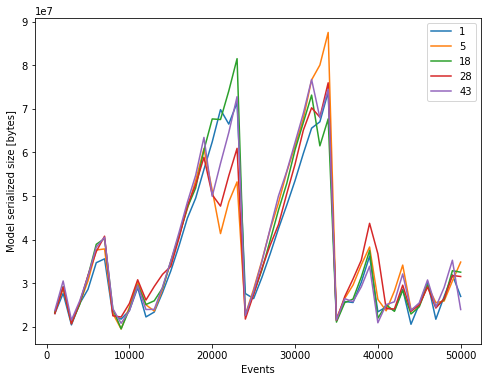

In [9]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [10]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_3_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_4_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_5_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 


]
labels = [
    '3',
    '4',
    '5',
    '25'
]

3 & 48.54 & 137.89\\
4 & 47.87 & 137.76\\
5 & 49.59 & 140.73\\
25 & 46.58 & 134.55\\


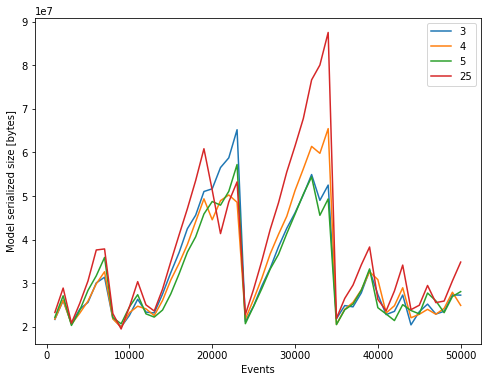

In [11]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [14]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_4,8_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_4,8,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_-1_clustream_relevance_30.csv', 


]
labels = [
    '2',
    '3',
    '8',
    '17'
]

2 & 47.45 & 137.78\\
3 & 47.14 & 136.73\\
8 & 46.58 & 134.55\\
17 & 48.37 & 137.45\\


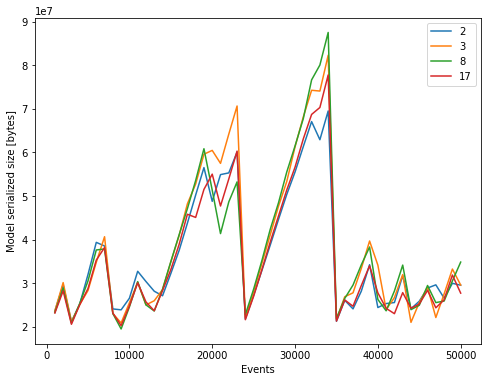

In [15]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [12]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_13_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_14_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 


]
labels = [
    'None',
    'Line and brigade',
    'Localization'
]

None & 46.58 & 134.55\\
Line and brigade & 47.13 & 136.57\\
Localization & 48.43 & 139.28\\


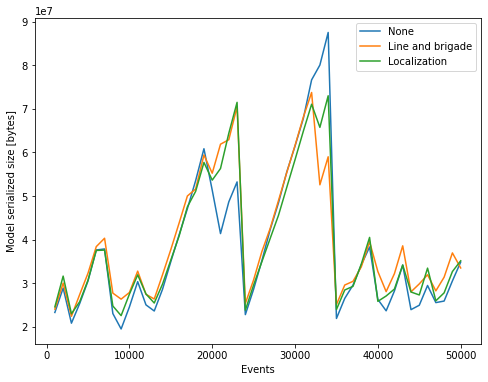

In [13]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [45]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_random_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_15.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_30.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_40.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_55.csv', 

    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cluster\metaAdaptiveRandomForestRegressor-s10-m80_5_25_-1_0,5,7,9_1,2,3,4,6,8,11,12_clustream_relevance_60.csv', 


]
labels = [
    'random & 0.3',
    'model & 0.1',
    'model & 0.15',
    'model & 0.3',
        'model & 0.4',
    'model & 0.55',
    'model & 0.6',
]

random & 0.3 & 48.16 & 138.43\\
model & 0.1 & 46.90 & 136.18\\
model & 0.15 & 47.98 & 135.78\\
model & 0.3 & 46.58 & 134.55\\
model & 0.4 & 49.08 & 136.96\\
model & 0.55 & 47.74 & 137.00\\
model & 0.6 & 47.69 & 136.09\\


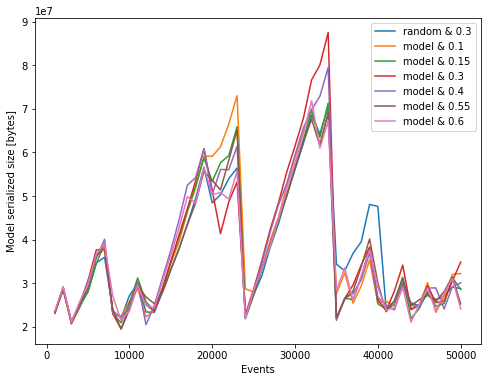

In [46]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [24]:
paths = [
        r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_1_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 

    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_5_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_18_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_43_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 



]
labels = [
    '1',
    '5',
    '18',
    '28',
    '43'
]

1 & 56.66 & 145.28\\
5 & 50.15 & 139.77\\
18 & 53.75 & 142.73\\
28 & 49.94 & 138.78\\
43 & 52.06 & 140.77\\


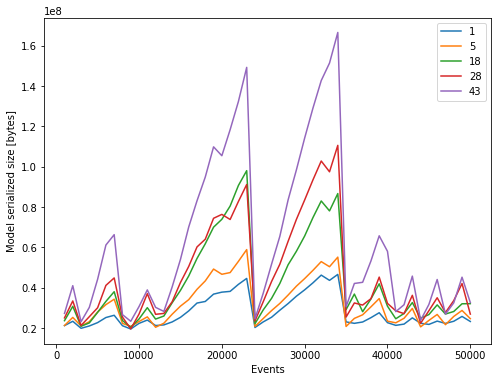

In [25]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [33]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_14_0,5,7,9_4,8,12_clustree_relevance_25.csv', 



]
labels = [
#     'ClusTree & 3',
#     'ClusTree & 5',
#     'ClusTree & 7',
#     'ClusTree & 25',
#     'CluStream & 7',
    'None',
    'Line and brigade',
    'Localization'
]

None & 49.94 & 138.78\\
Line and brigade & 48.51 & 137.14\\
Localization & 49.90 & 138.85\\


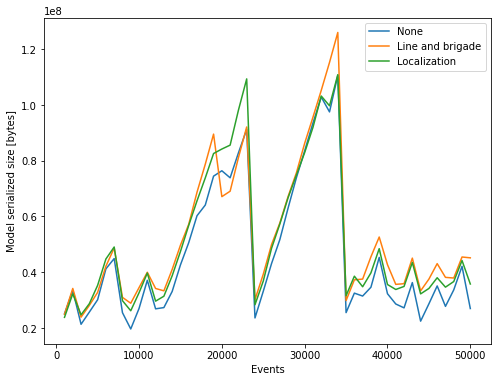

In [34]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [43]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_15.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
       r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_40.csv', 

    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_55.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\featureExtraction\metaAdaptiveRandomForestRegressor-s10_28_7_13_0,5,7,9_4,8,12_clustree_relevance_60.csv', 

]
labels = [
    'random & 0.25',
    'model & 0.1',
    'model & 0.15',
    'model & 0.25',
        'model & 0.4',

    'model & 0.55',
    'model & 0.6',
]

random & 0.25 & 49.42 & 137.90\\
model & 0.1 & 48.46 & 137.75\\
model & 0.15 & 49.52 & 140.43\\
model & 0.25 & 48.51 & 137.14\\
model & 0.4 & 48.73 & 137.05\\
model & 0.55 & 48.84 & 139.18\\
model & 0.6 & 49.64 & 138.12\\


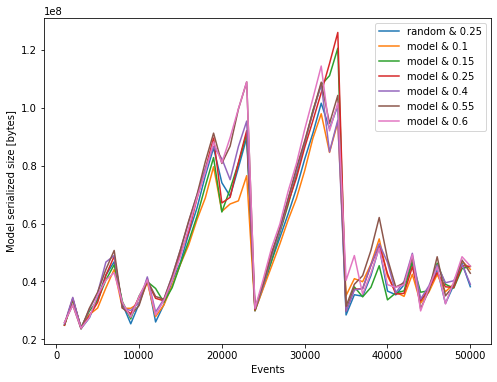

In [44]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [37]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_1_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_18_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_28_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_43_7_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 


]
labels = [
    '1',
    '5',
    '18',
    '28',
    '43'
]

1 & 47.82 & 137.41\\
5 & 47.48 & 138.84\\
18 & 48.20 & 139.47\\
28 & 47.62 & 138.26\\
43 & 47.93 & 139.75\\


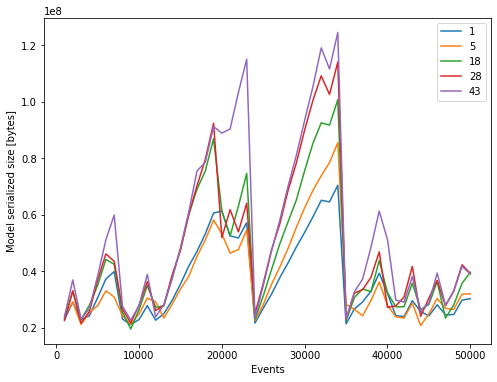

In [38]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [39]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_3_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_5_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_25_-1_0,5,7,9_4,8,12_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_25.csv', 


]
labels = [
    'ClusTree & 3',
    'ClusTree & 5',
    'ClusTree & 7',
    'ClusTree & 25',
    'CluStream & 7',
]

ClusTree & 3 & 49.01 & 137.33\\
ClusTree & 5 & 48.77 & 137.51\\
ClusTree & 7 & 47.06 & 137.79\\
ClusTree & 25 & 53.85 & 143.51\\
CluStream & 7 & 46.83 & 134.22\\


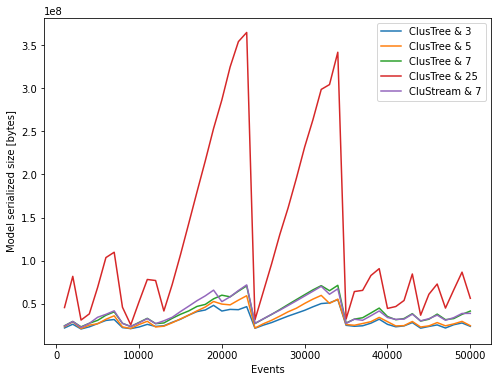

In [40]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [41]:
paths = [
 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_15.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_40.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_55.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210831\vavel_sup_slim\cep\metaAdaptiveRandomForestRegressor-s10_5_7_13_0,5,7,9_-1_clustream_relevance_55.csv', 


]
labels = [
    'random & 0.25',
    'model & 0.1',
    'model & 0.15',
    'model & 0.25',
        'model & 0.4',
    'model & 0.55',
    'model & 0.6',
]

random & 0.25 & 48.35 & 138.57\\
model & 0.1 & 48.50 & 139.15\\
model & 0.15 & 47.32 & 135.11\\
model & 0.25 & 46.83 & 134.22\\
model & 0.4 & 46.07 & 131.94\\
model & 0.55 & 47.32 & 136.45\\
model & 0.6 & 47.32 & 136.45\\


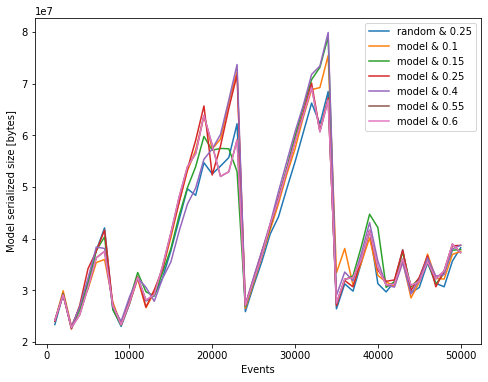

In [42]:
generate_matplotlib_graphs(paths, labels, './plots/20210907/vavel/cluster')

In [10]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\plain_arf_vavel.txt', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210606\cluster_rel_rf_vavel.txt',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210607\cluster_rel_quadrant_vavel.txt',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210607\cluster_rel_bus_vavel.txt',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210607\cluster_rel_line_vavel.txt',

]
labels = [
    'no_feature_extraction',
    'cluster_agg_longitude',
    'cluster_agg_quadrant',
    'cluster_agg_bus',
    'cluster_agg_line',
]

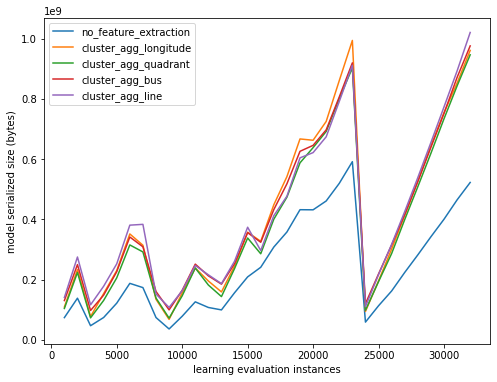

In [13]:
generate_matplotlib_graphs(paths, labels, './plots/vavel')

In [16]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\plain_arf_vavel.txt', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210608\plain_arf_vavel_slim.txt',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\20210609\cluster_random_vavel_slim.csv',

]
labels = [
    'No feature extraction',    
    'No feature extraction slim',
    'Cluster aggregation',
]

No feature extraction & 38.65 & 120.30\\
No feature extraction slim & 40.00 & 121.68\\
Cluster aggregation & 39.18 & 122.74\\


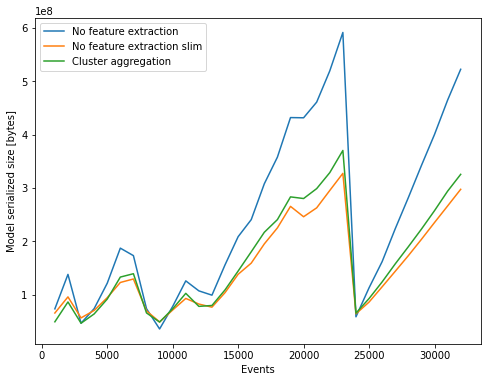

In [18]:
generate_matplotlib_graphs(paths, labels, './plots/poc/vavel_first')

cluster\_agg\_quadrant\_100 & 39.11(13.45) & 122.12(143.75)\\
cluster\_agg\_quadrant\_50 & 39.18(13.66) & 122.74(144.33)\\
cluster\_agg\_quadrant\_25 & 39.08(14.04) & 122.23(144.75)\\
cluster\_agg\_quadrant\_10 & 39.13(13.55) & 122.94(145.90)\\
cluster\_agg\_quadrant\_5 & 39.18(13.65) & 122.82(144.94)\\
cluster\_agg\_quadrant\_1 & 38.96(13.29) & 122.18(144.60)\\


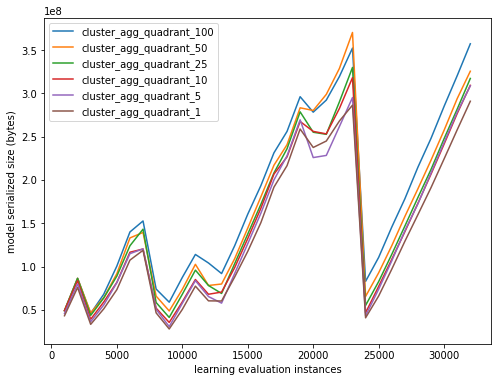

In [31]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_100_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_50_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_25_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_10_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_5_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_1_8_14_0,5,7,9_-1.csv', 

]
labels = [
    'cluster_agg_quadrant_100',    
    'cluster_agg_quadrant_50',    
    'cluster_agg_quadrant_25',
    'cluster_agg_quadrant_10',    
    'cluster_agg_quadrant_5',    
    'cluster_agg_quadrant_1',    

]
generate_matplotlib_graphs(paths, labels, './plots/n/vavel_n')

cluster\_agg\_quadrant\_clustree25 & 38.91(13.78) & 122.38(144.22)\\
cluster\_agg\_quadrant\_clustree15 & 39.51(13.68) & 121.61(139.46)\\
cluster\_agg\_quadrant\_clustree10 & 39.15(13.79) & 122.62(142.78)\\
cluster\_agg\_quadrant\_clustree8 & 39.11(13.45) & 122.12(143.75)\\
cluster\_agg\_quadrant\_clustree5 & 40.02(13.85) & 125.35(145.53)\\
cluster\_agg\_quadrant\_clustree3 & 40.79(15.20) & 124.14(143.74)\\
cluster\_agg\_quadrant\_clustream25 & 39.64(14.25) & 123.43(143.83)\\
cluster\_agg\_quadrant\_clustream15 & 39.60(13.97) & 123.45(142.98)\\
cluster\_agg\_quadrant\_clustream10 & 39.07(13.97) & 122.47(143.98)\\
cluster\_agg\_quadrant\_clustream8 & 39.32(13.76) & 122.58(144.29)\\
cluster\_agg\_quadrant\_clustream5 & 39.79(13.87) & 123.43(143.15)\\
cluster\_agg\_quadrant\_clustream3 & 40.54(14.93) & 122.88(143.94)\\


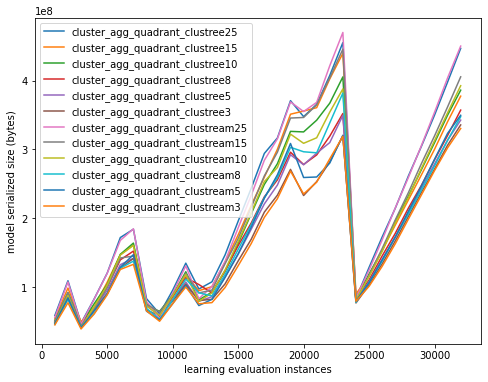

In [40]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c\vavel_slim_cluster_100_25_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c\vavel_slim_cluster_100_15_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c\vavel_slim_cluster_100_10_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\n\vavel_slim_cluster_100_8_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c\vavel_slim_cluster_100_5_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c\vavel_slim_cluster_100_3_14_0,5,7,9_-1.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_15_14_0,5,7,9_-1_clustream.csv',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_10_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_8_14_0,5,7,9_-1_clustream.csv',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_5_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\c2\vavel_slim_cluster_100_3_14_0,5,7,9_-1_clustream.csv', 
]
labels = [
    'cluster_agg_quadrant_clustree25',   
    'cluster_agg_quadrant_clustree15',    
    'cluster_agg_quadrant_clustree10',    
    'cluster_agg_quadrant_clustree8',    
    'cluster_agg_quadrant_clustree5',
    'cluster_agg_quadrant_clustree3', 
    'cluster_agg_quadrant_clustream25',    
    'cluster_agg_quadrant_clustream15',    

    'cluster_agg_quadrant_clustream10',    
    'cluster_agg_quadrant_clustream8',    

    'cluster_agg_quadrant_clustream5',    
    'cluster_agg_quadrant_clustream3',    


]
generate_matplotlib_graphs(paths, labels, './plots/c/vavel_c')

cluster\_agg\_quadrant\_b17 & 38.91(13.78) & 122.38(144.22)\\
cluster\_agg\_quadrant\_b8 & 39.55(14.18) & 123.42(143.83)\\
cluster\_agg\_quadrant\_b3 & 40.33(14.22) & 125.67(145.29)\\
cluster\_agg\_quadrant\_b2 & 40.59(14.57) & 126.44(148.19)\\


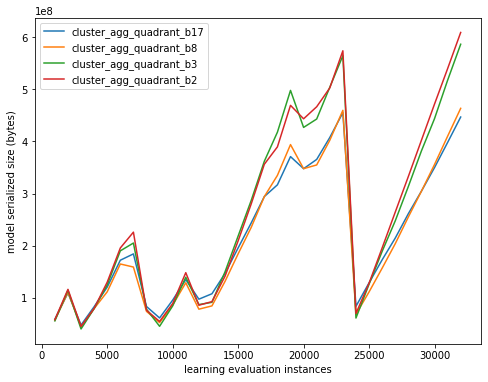

In [6]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\b\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\b\vavel_slim_cluster_100_25_14_0,5,7,9_1,2,3,4,6,8,11,12_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\b\vavel_slim_cluster_100_25_14_0,5,7,9_4,8,12_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\b\vavel_slim_cluster_100_25_14_0,5,7,9_4,8_clustree.csv', 

]
labels = [
    'cluster_agg_quadrant_b17',   
    'cluster_agg_quadrant_b8',    
    'cluster_agg_quadrant_b3',    
    'cluster_agg_quadrant_b2',    

]
generate_matplotlib_graphs(paths, labels, './plots/b/vavel_b')

cep\_agg\_quadrant\_n100 & 39.09(13.75) & 121.85(141.05)\\
cep\_agg\_quadrant\_n50 & 39.20(13.92) & 121.75(139.85)\\
cep\_agg\_quadrant\_n25 & 39.04(13.76) & 122.17(142.08)\\
cep\_agg\_quadrant\_n10 & 39.05(13.56) & 121.22(140.06)\\
cep\_agg\_quadrant\_n5 & 39.07(13.72) & 121.26(139.91)\\
cep\_agg\_quadrant\_n1 & 39.07(13.41) & 121.13(139.10)\\


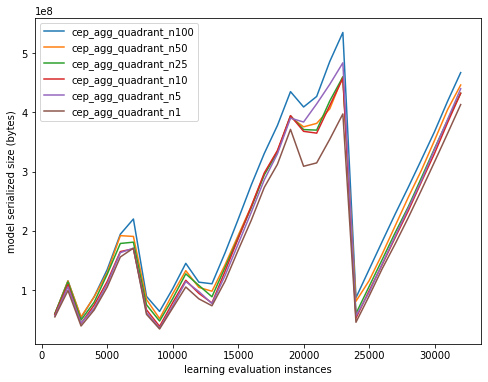

In [8]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_100_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_50_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_10_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_5_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_1_6_14_0,5,7,9_-1_clustree.csv', 

]
labels = [
    'cep_agg_quadrant_n100',   
    'cep_agg_quadrant_n50',  
    'cep_agg_quadrant_n25',    
    'cep_agg_quadrant_n10',    
    'cep_agg_quadrant_n5',    
    'cep_agg_quadrant_n1',    

]
generate_matplotlib_graphs(paths, labels, './plots/cep/vavel_cep_n')

feature\_extract\_quadrant\_n25 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_n10 & 39.10(13.83) & 122.39(144.22)\\
feature\_extract\_quadrant\_n5 & 39.61(14.10) & 124.28(145.74)\\
feature\_extract\_quadrant\_n3 & 40.43(15.12) & 122.38(143.70)\\
feature\_extract\_quadrant\_n1 & 43.41(16.15) & 128.34(145.71)\\


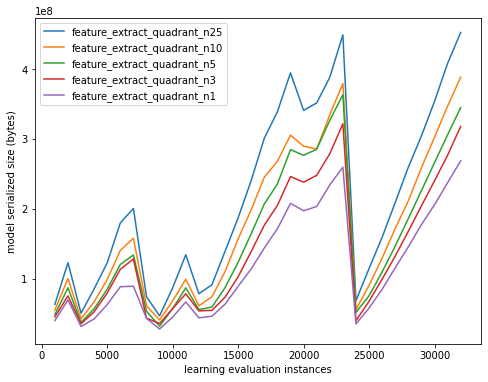

In [9]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_25_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_10_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_5_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_3_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_1_25_14_0,5,7,9_-1_clustree.csv', 


]
labels = [
    'feature_extract_quadrant_n25',   
    'feature_extract_quadrant_n10',   
    'feature_extract_quadrant_n5',   
    'feature_extract_quadrant_n3',   
    'feature_extract_quadrant_n1',   

]
generate_matplotlib_graphs(paths, labels, './plots/extract/vavel_extract_n')

naive\_quadrant\_n10 & 40.92(14.65) & 127.58(149.26)\\
naive\_quadrant\_n5 & 40.82(14.32) & 124.50(139.64)\\
naive\_quadrant\_n3 & 40.94(14.26) & 125.92(144.48)\\
naive\_quadrant\_n1 & 41.45(15.52) & 125.45(145.52)\\


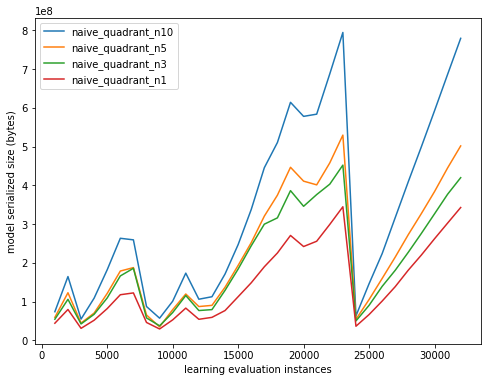

In [11]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\naive\vavel_slim_naive_10_25_14_0,5,7,9_4,8,12_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\naive\vavel_slim_naive_5_25_14_0,5,7,9_4,8,12_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\naive\vavel_slim_naive_3_25_14_0,5,7,9_4,8,12_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\naive\vavel_slim_naive_1_25_14_0,5,7,9_4,8,12_clustree.csv', 


]
labels = [
    'naive_quadrant_n10',   
    'naive_quadrant_n5',   
    'naive_quadrant_n3',   
    'naive_quadrant_n1',   

]
generate_matplotlib_graphs(paths, labels, './plots/naive/vavel_naive_n')

feature\_extract\_quadrant\_clustree25 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustree8 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustree5 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustree4 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustree3 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustree2 & 38.94(13.51) & 121.46(141.72)\\
feature\_extract\_quadrant\_clustream25 & 38.95(13.63) & 121.25(141.65)\\
feature\_extract\_quadrant\_clustream8 & 38.76(13.13) & 120.62(139.97)\\
feature\_extract\_quadrant\_clustream5 & 38.85(13.17) & 120.71(139.76)\\
feature\_extract\_quadrant\_clustream4 & 39.03(13.44) & 121.52(141.85)\\
feature\_extract\_quadrant\_clustream3 & 38.91(13.40) & 121.34(141.89)\\
feature\_extract\_quadrant\_clustream2 & 38.80(13.39) & 120.77(141.11)\\


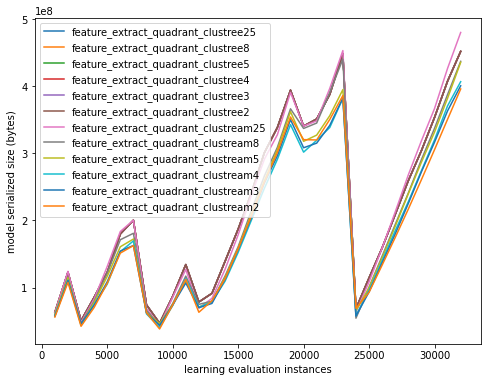

In [13]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\vavel_slim_featureExtraction_25_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_5_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_4_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_3_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_2_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_25_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_5_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_4_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_3_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_2_14_0,5,7,9_-1_clustream.csv', 
 


]
labels = [
    'feature_extract_quadrant_clustree25',   
    'feature_extract_quadrant_clustree8',   
    'feature_extract_quadrant_clustree5',   
    'feature_extract_quadrant_clustree4',   
    'feature_extract_quadrant_clustree3',   
    'feature_extract_quadrant_clustree2',   
    'feature_extract_quadrant_clustream25',   
    'feature_extract_quadrant_clustream8',      
    'feature_extract_quadrant_clustream5',   
    'feature_extract_quadrant_clustream4',   
    'feature_extract_quadrant_clustream3',   
    'feature_extract_quadrant_clustream2',   
]
generate_matplotlib_graphs(paths, labels, './plots/extract/vavel_extract_c')

cep\_agg\_quadrant\_clustree10 & 41.99(14.99) & 126.97(138.83)\\
cep\_agg\_quadrant\_clustree8 & 40.27(14.19) & 124.79(147.48)\\
cep\_agg\_quadrant\_clustree6 & 39.04(13.76) & 122.17(142.08)\\
cep\_agg\_quadrant\_clustree4 & 39.64(13.87) & 123.30(143.26)\\
cep\_agg\_quadrant\_clustree3 & 39.39(13.40) & 124.30(146.54)\\
cep\_agg\_quadrant\_clustream10 & 41.84(15.05) & 126.18(139.71)\\
cep\_agg\_quadrant\_clustream8 & 40.47(14.32) & 123.84(144.98)\\
cep\_agg\_quadrant\_clustream6 & 38.94(13.48) & 120.78(138.65)\\
cep\_agg\_quadrant\_clustream4 & 39.52(13.45) & 123.05(142.24)\\
cep\_agg\_quadrant\_clustream3 & 39.45(13.27) & 123.32(143.78)\\


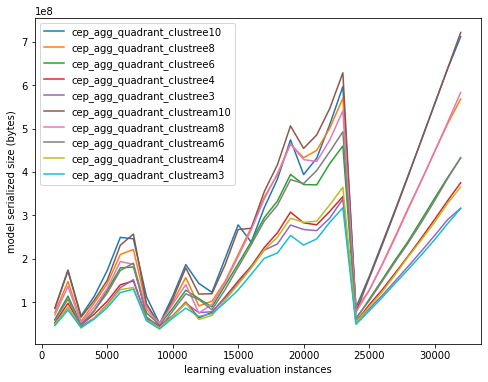

In [21]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_10_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_8_14_0,5,7,9_-1_clustree.csv',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_4_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_3_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_10_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_8_14_0,5,7,9_-1_clustream.csv', 
        r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_4_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_3_14_0,5,7,9_-1_clustream.csv', 
    


]
labels = [
    'cep_agg_quadrant_clustree10',   
    'cep_agg_quadrant_clustree8',   
    'cep_agg_quadrant_clustree6',   
    'cep_agg_quadrant_clustree4',   
    'cep_agg_quadrant_clustree3',   
    'cep_agg_quadrant_clustream10',   
    'cep_agg_quadrant_clustream8',  
        'cep_agg_quadrant_clustream6',      
    'cep_agg_quadrant_clustream4',   
    'cep_agg_quadrant_clustream3',      
]
generate_matplotlib_graphs(paths, labels, './plots/cep/vavel_cep_c')

cluster\_agg\_quadrant\_random1 & 38.91(13.78) & 122.38(144.22)\\
cluster\_agg\_quadrant\_random0.5 & 39.00(13.46) & 121.28(140.76)\\
cluster\_agg\_quadrant\_random0.25 & 38.76(13.44) & 122.02(142.33)\\
cluster\_agg\_quadrant\_random0.1 & 38.86(13.80) & 122.17(143.83)\\
cluster\_agg\_quadrant\_relevance0.5 & 38.91(13.78) & 121.60(142.18)\\
cluster\_agg\_quadrant\_relevance0.25 & 38.94(13.54) & 121.95(143.06)\\
cluster\_agg\_quadrant\_relevance0.1 & 38.97(13.53) & 120.70(139.72)\\


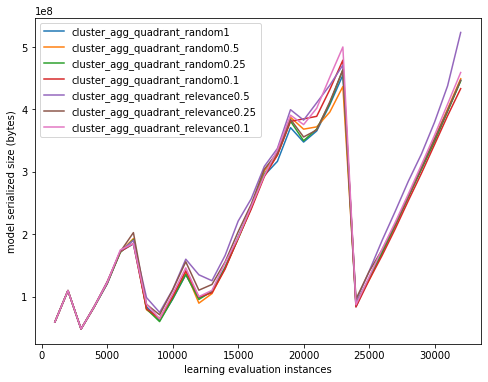

In [18]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\b\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_random_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_random_10.csv', 
   r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_relevance_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_relevance_10.csv', 

    


]
labels = [
    'cluster_agg_quadrant_random1',   
    'cluster_agg_quadrant_random0.5',   
    'cluster_agg_quadrant_random0.25',   
    'cluster_agg_quadrant_random0.1',   
    'cluster_agg_quadrant_relevance0.5',   
    'cluster_agg_quadrant_relevance0.25',   
    'cluster_agg_quadrant_relevance0.1',        
]
generate_matplotlib_graphs(paths, labels, './plots/r/vavel_r')

extract\_agg\_quadrant\_random1 & 38.76(13.13) & 120.62(139.97)\\
extract\_agg\_quadrant\_random0.5 & 38.96(13.39) & 121.57(142.29)\\
extract\_agg\_quadrant\_random0.25 & 38.86(13.33) & 121.48(141.45)\\
extract\_agg\_quadrant\_random0.1 & 38.74(13.43) & 120.29(140.51)\\
extract\_agg\_quadrant\_relevance0.5 & 38.87(13.48) & 121.13(141.25)\\
extract\_agg\_quadrant\_relevance0.25 & 38.95(13.39) & 120.86(139.80)\\
extract\_agg\_quadrant\_relevance0.1 & 38.70(13.52) & 121.39(142.31)\\


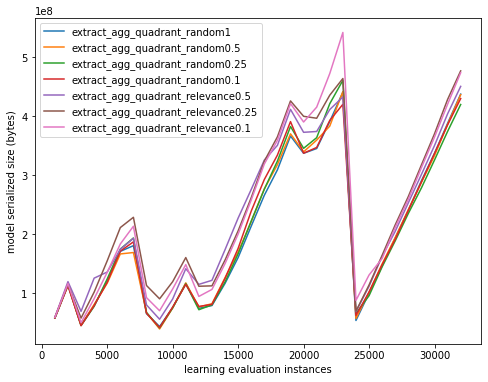

In [24]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\c\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_random_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_random_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_relevance_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_relevance_10.csv', 

    


]
labels = [
    'extract_agg_quadrant_random1',   
    'extract_agg_quadrant_random0.5',   
    'extract_agg_quadrant_random0.25',   
    'extract_agg_quadrant_random0.1',   
    'extract_agg_quadrant_relevance0.5',   
    'extract_agg_quadrant_relevance0.25',   
    'extract_agg_quadrant_relevance0.1',        
]
generate_matplotlib_graphs(paths, labels, './plots/extract/vavel_extract_r')

cep\_agg\_quadrant\_random1 & 38.94(13.48) & 120.78(138.65)\\
cep\_agg\_quadrant\_random0.5 & 38.87(13.41) & 120.26(138.20)\\
cep\_agg\_quadrant\_random0.25 & 39.15(13.33) & 121.24(138.59)\\
cep\_agg\_quadrant\_random0.1 & 38.98(13.45) & 121.25(139.21)\\
cep\_agg\_quadrant\_relevance0.5 & 39.14(13.51) & 121.25(139.59)\\
cep\_agg\_quadrant\_relevance0.25 & 39.00(13.72) & 121.71(141.38)\\
cep\_agg\_quadrant\_relevance0.1 & 39.10(13.63) & 121.47(139.65)\\


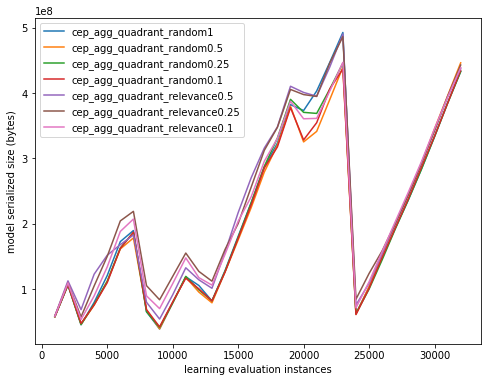

In [25]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\c\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_10.csv', 

    


]
labels = [
    'cep_agg_quadrant_random1',   
    'cep_agg_quadrant_random0.5',   
    'cep_agg_quadrant_random0.25',   
    'cep_agg_quadrant_random0.1',   
    'cep_agg_quadrant_relevance0.5',   
    'cep_agg_quadrant_relevance0.25',   
    'cep_agg_quadrant_relevance0.1',        
]
generate_matplotlib_graphs(paths, labels, './plots/cep/vavel_cep_r')

In [ ]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cepw\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_relevance_10.csv', 

    


]
labels = [
    'cep_agg_quadrant_random1',   
    'cep_agg_quadrant_random0.5',   
    'cep_agg_quadrant_random0.25',   
    'cep_agg_quadrant_random0.1',   
    'cep_agg_quadrant_relevance0.5',   
    'cep_agg_quadrant_relevance0.25',   
    'cep_agg_quadrant_relevance0.1',        
]
generate_matplotlib_graphs(paths, labels, './plots/cep/vavel_cep_p')

100 & 39.22(14.71) & 125.24(150.70)\\
50 & 39.35(14.41) & 124.65(148.62)\\
25 & 39.16(14.79) & 124.24(150.09)\\
10 & 39.24(14.74) & 124.69(150.26)\\
5 & 39.12(14.61) & 124.43(149.19)\\


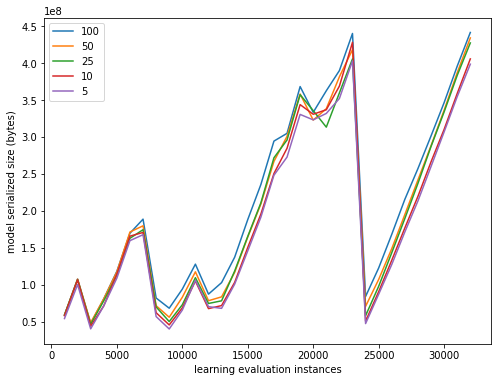

In [31]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210613\cluster\n\vavel_slim_cluster_100_8_14_0,5,7,9_-1_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210613\cluster\n\vavel_slim_cluster_50_8_14_0,5,7,9_-1_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210613\cluster\n\vavel_slim_cluster_25_8_14_0,5,7,9_-1_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210613\cluster\n\vavel_slim_cluster_10_8_14_0,5,7,9_-1_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\20210613\cluster\n\vavel_slim_cluster_5_8_14_0,5,7,9_-1_clustree_random_100.csv', 


]
labels = [
    '100',   
    '50',   
    '25',   
    '10',   
    '5',          
]
generate_matplotlib_graphs(paths, labels, './plots/cluster/vavel_cluster_n')

TargetMean & 90.42 & 186.83\\
FadingTargetMean & 94.02 & 185.64\\
AdaptiveRandomForestRegressor & 38.65 & 120.30\\
AdaptiveRandomForestRegressor -m 80 & 40.42 & 126.65\\
ARFFIMTDD & 82.61 & 172.15\\
TargetMean slim & 90.42 & 186.83\\
FadingTargetMean slim & 94.02 & 185.64\\
AdaptiveRandomForestRegressor slim & 40.00 & 121.68\\
AdaptiveRandomForestRegressor -m 80 slim & 38.91 & 122.17\\
ARFFIMTDD slim & 83.04 & 167.10\\


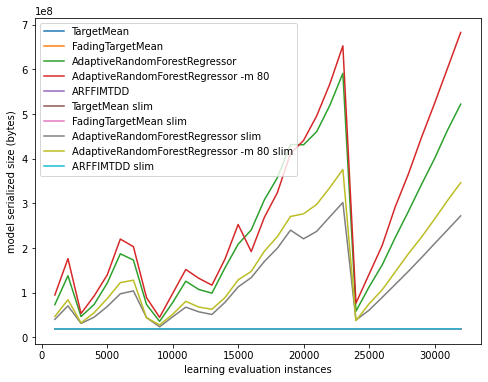

In [7]:
learners = [
    'rules.functions.TargetMean',
    'rules.functions.FadingTargetMean',
#     'functions.AdaGrad',
    'meta.AdaptiveRandomForestRegressor',
    'meta.AdaptiveRandomForestRegressor -m 80',
#     'rules.AMRulesRegressor',
#     'rules.functions.Perceptron',
    'trees.ARFFIMTDD',
]

paths = [ r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\\' + l.replace(' ','') for l in learners ] + [ r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\slim\\' + l.replace(' ','')  for l in learners ]
labels = [n.split('.')[-1] for n in learners] + [n.split('.')[-1] + " slim" for n in learners]
generate_matplotlib_graphs(paths, labels, './plots/pre/vavel_pre_')

Adaptive Random Forest full & 38.65 & 120.30\\
Adaptive Random Forest slim & 40.00 & 121.68\\
Cluster aggregation & 38.97 & 120.70\\
Concatenated feature extraction & 38.74 & 120.29\\
Complex event aggregation & 38.87 & 120.26\\


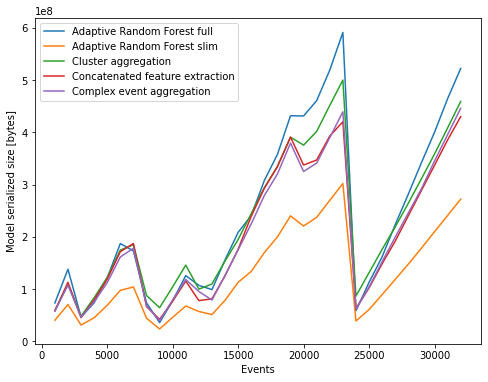

In [23]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\meta.AdaptiveRandomForestRegressor', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\slim\meta.AdaptiveRandomForestRegressor', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\r\vavel_slim_cluster_100_25_14_0,5,7,9_-1_clustree_relevance_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\extract\r\vavel_slim_featureExtraction_25_8_14_0,5,7,9_-1_clustream_random_10.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\cep\r\vavel_slim_cep_25_6_14_0,5,7,9_-1_clustream_random_50.csv', 


]
labels = [
    'Adaptive Random Forest full',   
    'Adaptive Random Forest slim',   
    'Cluster aggregation',   
    'Concatenated feature extraction',   
    'Complex event aggregation',          
]
generate_matplotlib_graphs(paths, labels, './plots/final/vavel_sup_final_n')

In [3]:
def generate_graph(yname, figname, labels, frames, is_relative= False, print_result=False, xname = 'learning evaluation instances' , plot = True):
    plt.clf()
       
    result = {}

    index = 0
    for frame in frames:
        y = frame[yname] - frames[0][yname] if is_relative else frame[yname]
        if plot:
            plt.plot(frame[xname],y)
        result[labels[index]] = ("{:.2f}".format(np.mean(y)), "{:.2f}".format(np.std(y)))
        index += 1
    if plot:
        plt.xlabel(xname)
        plt.ylabel('relative ' + yname if is_relative else yname)
        plt.legend(labels)
        plt.savefig(figname)
    
    return result 

    if print_result:
        print(result)
import pathlib    
def generate_matplotlib_graphs_classification(paths, labels, filename, plot = True):
    path= "/".join(filename.split("/")[:-1])
    pathlib.Path(path).mkdir(parents=True, exist_ok=True)
    frames = []
    for tup in zip(paths,labels):
        frames.append(pd.read_csv(tup[0], sep = ','))
    

    
    acc = generate_graph('classifications correct (percent)', f'{filename}_acc.png', labels, frames , plot = plot)

    
    for label in acc:
        escaped_label = label.replace("_","\\_")
#         print(f'{escaped_label} & {mae[label][0]}({mae[label][1]}) & {rmse[label][0]}({rmse[label][1]})\\\\')
        print(f'{escaped_label} & {acc[label][0]} \\\\')

In [46]:
import glob

generated_sets = ['generators.RandomRBFGenerator', 'generators.HyperplaneGenerator','generators.LEDGenerator','wisdm','electricity']


paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generator2',
        r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm'
]
li = []
clf_dict = dict()
all_files = glob.glob(paths[0] + "/*") +  glob.glob(paths[1] + "/*")
    
for filename in all_files:
    df = pd.read_csv(filename)
    li.append((filename.split('\\')[-1][:-4].split('_'),df))

for tup in li:
    clf = tup[0][0].split('.')[-1]
    full_ds = tup[0][1]
    ds = full_ds.split('.')[-1]
    acc = "{:.2f}".format(np.mean(tup[1]['classifications correct (percent)']))
    print(full_ds, generated_sets.index(full_ds), acc)
    if clf in clf_dict:
        clf_dict[clf][generated_sets.index(full_ds)] = acc
    else:
        clf_dict[clf] = ['0' for set in generated_sets]
        clf_dict[clf][generated_sets.index(full_ds)] = acc

    

clf_dict

generators.HyperplaneGenerator 1 93.29
generators.LEDGenerator 2 73.71
generators.RandomRBFGenerator 0 71.92
generators.HyperplaneGenerator 1 49.90
generators.LEDGenerator 2 10.15
generators.RandomRBFGenerator 0 49.63
generators.HyperplaneGenerator 1 49.52
generators.LEDGenerator 2 9.97
generators.RandomRBFGenerator 0 50.25
generators.HyperplaneGenerator 1 86.89
generators.LEDGenerator 2 60.74
generators.RandomRBFGenerator 0 94.96
generators.HyperplaneGenerator 1 87.13
generators.LEDGenerator 2 73.23
generators.RandomRBFGenerator 0 93.78
generators.HyperplaneGenerator 1 87.26
generators.LEDGenerator 2 72.95
generators.RandomRBFGenerator 0 93.53
generators.HyperplaneGenerator 1 89.89
generators.LEDGenerator 2 73.57
generators.RandomRBFGenerator 0 86.00
generators.HyperplaneGenerator 1 86.76
generators.LEDGenerator 2 72.95
generators.RandomRBFGenerator 0 81.27
electricity 4 73.33
wisdm 3 75.63
electricity 4 57.60
wisdm 3 38.46
electricity 4 85.36
wisdm 3 93.00
electricity 4 82.83
wisdm 3

{'NaiveBayes': ['71.92', '93.29', '73.71', '75.63', '73.33'],
 'MajorityClass': ['49.63', '49.90', '10.15', '38.46', '57.60'],
 'NoChange': ['50.25', '49.52', '9.97', '93.00', '85.36'],
 'SAMkNN': ['94.96', '86.89', '60.74', '53.15', '82.83'],
 'AdaptiveRandomForest-m80': ['93.78', '87.13', '73.23', '84.19', '90.55'],
 'AdaptiveRandomForest': ['93.53', '87.26', '72.95', '84.96', '90.61'],
 'OzaBagAdwin': ['86.00', '89.89', '73.57', '78.48', '84.39'],
 'HoeffdingAdaptiveTree': ['81.27', '86.76', '72.95', '75.31', '83.46']}

In [48]:
print_clf_dict = [ f'{k} & {" & ".join(clf_dict[k])}\\\\'  for k in clf_dict]

In [39]:
print_clf_dict

['NaiveBayes & 71.16 & 91.44 & 72.79\\\\',
 'MajorityClass & 50.41 & 50.11 & 10.32\\\\',
 'NoChange & 50.46 & 49.72 & 9.49\\\\',
 'SAMkNN & 94.28 & 84.98 & 57.62\\\\',
 'AdaptiveRandomForest-m80 & 90.77 & 84.76 & 69.78\\\\',
 'AdaptiveRandomForest & 90.60 & 84.66 & 69.09\\\\',
 'OzaBagAdwin & 74.52 & 89.31 & 72.49\\\\',
 'HoeffdingAdaptiveTree & 73.44 & 86.88 & 72.46\\\\']

In [40]:
print('\n'.join(print_clf_dict))

NaiveBayes & 71.16 & 91.44 & 72.79\\
MajorityClass & 50.41 & 50.11 & 10.32\\
NoChange & 50.46 & 49.72 & 9.49\\
SAMkNN & 94.28 & 84.98 & 57.62\\
AdaptiveRandomForest-m80 & 90.77 & 84.76 & 69.78\\
AdaptiveRandomForest & 90.60 & 84.66 & 69.09\\
OzaBagAdwin & 74.52 & 89.31 & 72.49\\
HoeffdingAdaptiveTree & 73.44 & 86.88 & 72.46\\


In [49]:
print('\n'.join(print_clf_dict))

NaiveBayes & 71.92 & 93.29 & 73.71 & 75.63 & 73.33\\
MajorityClass & 49.63 & 49.90 & 10.15 & 38.46 & 57.60\\
NoChange & 50.25 & 49.52 & 9.97 & 93.00 & 85.36\\
SAMkNN & 94.96 & 86.89 & 60.74 & 53.15 & 82.83\\
AdaptiveRandomForest-m80 & 93.78 & 87.13 & 73.23 & 84.19 & 90.55\\
AdaptiveRandomForest & 93.53 & 87.26 & 72.95 & 84.96 & 90.61\\
OzaBagAdwin & 86.00 & 89.89 & 73.57 & 78.48 & 84.39\\
HoeffdingAdaptiveTree & 81.27 & 86.76 & 72.95 & 75.31 & 83.46\\


n=100 & 83.98 \\
n=50 & 84.00 \\
n=25 & 84.20 \\
n=10 & 84.24 \\
n=5 & 83.85 \\
n=1 & 84.83 \\


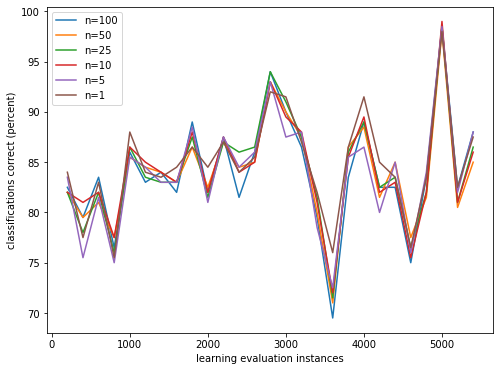

In [13]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_100_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_50_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_25_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_10_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_5_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_1_8_clustree_random_100.csv', 


]
labels = [
    'n=100',   
    'n=50',   
    'n=25',   
    'n=10',   
    'n=5',   
    'n=1',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

n=100 & 82.80 \\
n=50 & 83.26 \\
n=25 & 82.70 \\
n=10 & 82.94 \\
n=5 & 83.44 \\
n=1 & 83.43 \\


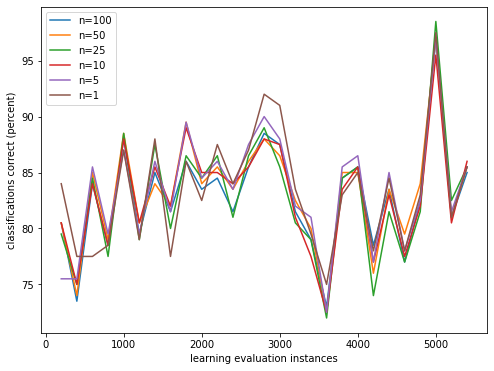

In [17]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_100_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_50_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_25_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_10_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_5_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_1_8_clustree_random_100.csv', 


]
labels = [
    'n=100',   
    'n=50',   
    'n=25',   
    'n=10',   
    'n=5',   
    'n=1',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

c=6 & 84.75 \\
c=4 & 84.48 \\
c2=6 & 84.75 \\
c2=4 & 84.48 \\


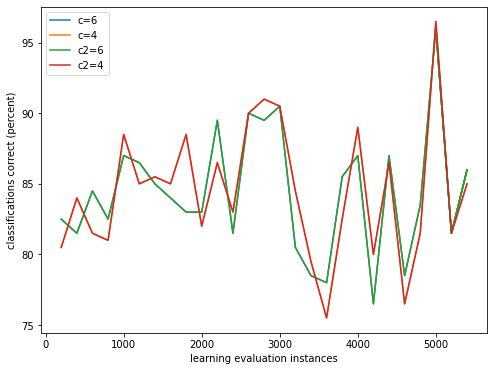

In [23]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_1_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_1_4_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_1_6_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cep_1_4_clustream_random_100.csv', 


]
labels = [
    'c=6',   
    'c=4',   
        'c2=6',   
    'c2=4',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

c=6 & 84.39 \\
c=4 & 84.87 \\
c2=6 & 84.43 \\
c2=4 & 84.87 \\


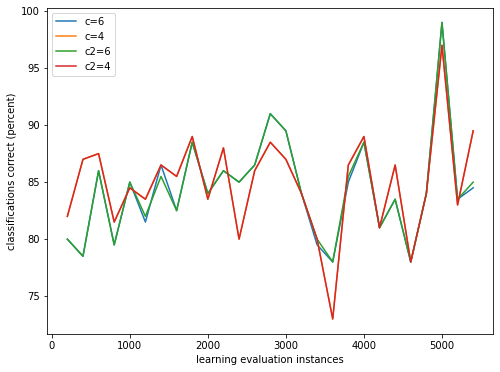

In [30]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_1_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_1_4_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_1_6_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_cluster_1_4_clustream_random_100.csv', 


]
labels = [
    'c=6',   
    'c=4',   
        'c2=6',   
    'c2=4',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

c=6 & 84.35 \\
c=4 & 84.35 \\
c2=6 & 84.35 \\
c2=4 & 84.35 \\


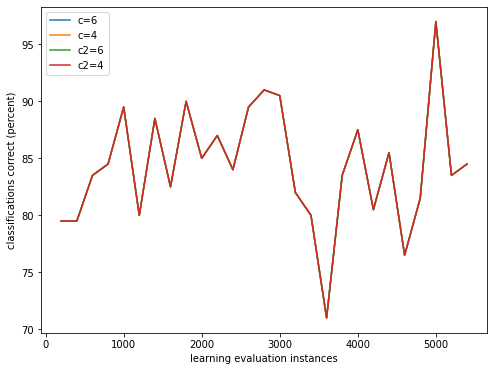

In [27]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_4_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_4_clustream_random_100.csv', 


]
labels = [
    'c=6',   
    'c=4',   
        'c2=6',   
    'c2=4',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 84.35 \\
c=4 & 84.35 \\
c2=6 & 84.35 \\
c2=4 & 84.35 \\


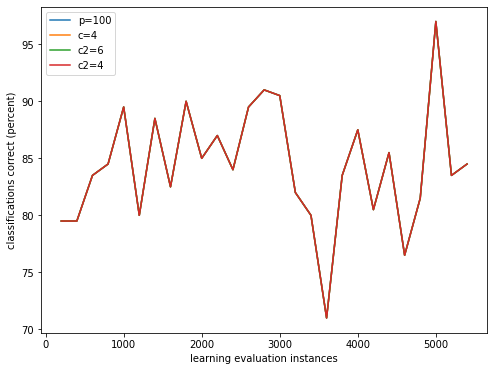

In [32]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustree_random_100.csv', 
       r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustree_random_50.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustree_random_25.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\wisdm\buffer\wisdm_featureExtraction_1_6_clustree_random_10.csv', 


]
labels = [
    'p=100',   
    'c=4',   
        'c2=6',   
    'c2=4',   
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 89.74 \\
c=4 & 89.77 \\
c2=6 & 90.50 \\


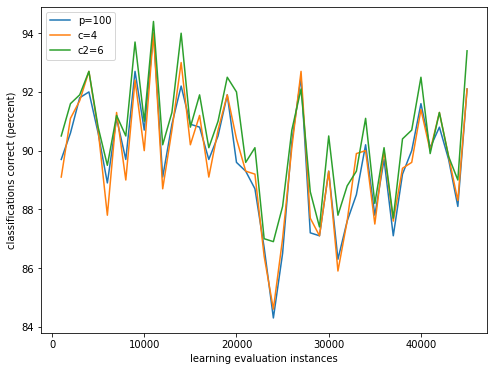

In [39]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cluster_10_8_clustree_random_100.csv', 
       r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cluster_5_8_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cluster_1_8_clustree_random_100.csv', 


]
labels = [
    'p=100',   
    'c=4',   
        'c2=6',  
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 89.40 \\
c=4 & 89.39 \\
c2=6 & 89.57 \\
p2=100 & 89.77 \\
c3=4 & 89.86 \\
c4=6 & 90.10 \\
p3=100 & 89.92 \\
c5=4 & 89.37 \\


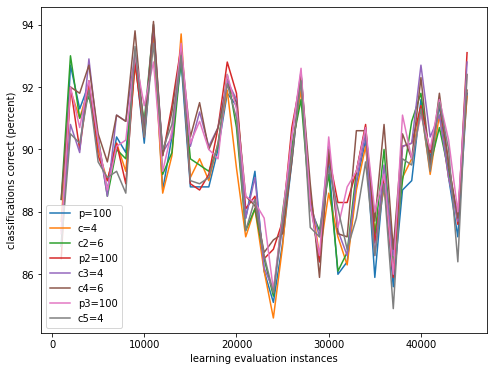

In [41]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cep_10_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cep_5_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cep_3_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_cep_1_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_featureExtraction_10_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_featureExtraction_5_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_featureExtraction_3_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\electricity\buffer\wisdm_featureExtraction_1_4_clustream_random_100.csv', 


]
labels = [
    'p=100',   
    'c=4',   
    'c2=6',  
    'p2=100',   
    'c3=4',   
    'c4=6',     
    'p3=100',   
    'c5=4',   
    'c6=6', 
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 73.82 \\
c=4 & 85.06 \\
c2=6 & 82.67 \\


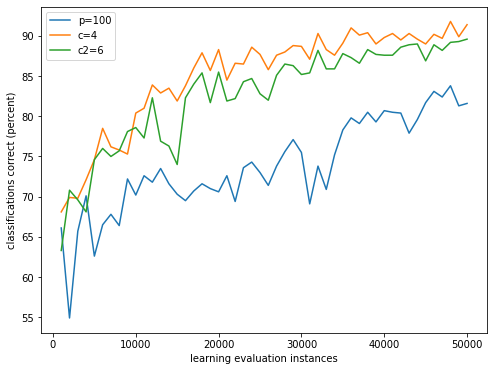

In [42]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\wisdm_cep_10_4_clustream_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\wisdm_cluster_10_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\wisdm_featureExtraction_10_4_clustream_random_100.csv', 


]
labels = [
    'p=100',   
    'c=4',   
    'c2=6',  
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 84.83 \\
c=4 & 72.08 \\
c2=6 & 88.47 \\


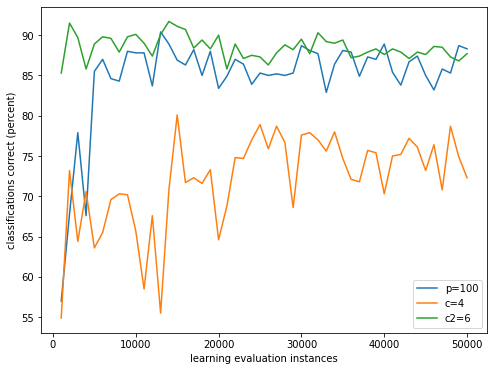

In [44]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\hyperplane_featureExtraction_10_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\hyperplane_cep_10_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\hyperplane_cluster_10_6_clustree_random_100.csv', 


]
labels = [
    'p=100',   
    'c=4',   
    'c2=6',  
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

p=100 & 67.84 \\
c=4 & 67.02 \\
c2=6 & 73.35 \\


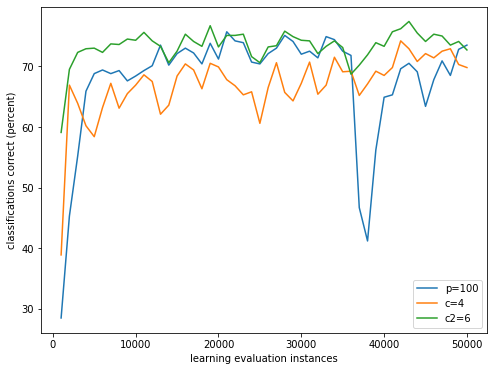

In [45]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\led_featureExtraction_10_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\led_cep_10_6_clustree_random_100.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\generated\buffer\led_cluster_10_6_clustree_random_100.csv', 


]
labels = [
    'p=100',   
    'c=4',   
    'c2=6',  
]
generate_matplotlib_graphs_classification(paths, labels, './plots/scratch/tmp_')

In [48]:
import glob


paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\tuning\airlines'
]
li = []
clf_dict = dict()
all_files = glob.glob(paths[0] + "/*")
    
for filename in all_files:
    df = pd.read_csv(filename)
    li.append((filename.split('\\')[-1],df))

for tup in li:
    clf = tup[0].split('.')[-1]
    mae = "{:.2f}".format(np.mean(tup[1]['mean absolute error']))
    rmse = "{:.2f}".format(np.mean(tup[1]['root mean squared error']))
    print(mae, rmse)
    clf_dict[clf] = (mae,rmse)
    

clf_dict

21.74 36.52
20.72 36.09
20.75 36.08
20.53 36.32
21.75 36.64
21.11 35.70
22.04 37.29
23.21 37.38


{'AdaGrad': ('21.74', '36.52'),
 'AdaptiveRandomForestRegressor': ('20.72', '36.09'),
 'AdaptiveRandomForestRegressor-m80': ('20.75', '36.08'),
 'AMRulesRegressor': ('20.53', '36.32'),
 'FadingTargetMean': ('21.75', '36.64'),
 'Perceptron': ('21.11', '35.70'),
 'TargetMean': ('22.04', '37.29'),
 'ARFFIMTDD': ('23.21', '37.38')}

In [49]:
print_clf_dict = [ f'{k} & {" & ".join(clf_dict[k])}\\\\'  for k in clf_dict]

In [51]:
print('\n'.join(print_clf_dict))

AdaGrad & 21.74 & 36.52\\
AdaptiveRandomForestRegressor & 20.72 & 36.09\\
AdaptiveRandomForestRegressor-m80 & 20.75 & 36.08\\
AMRulesRegressor & 20.53 & 36.32\\
FadingTargetMean & 21.75 & 36.64\\
Perceptron & 21.11 & 35.70\\
TargetMean & 22.04 & 37.29\\
ARFFIMTDD & 23.21 & 37.38\\


AdaGrad & 0.51 & 0.64\\
AdaGrad + buffer & 0.32 & 0.40\\
AMRules & 0.40 & 0.50\\
AMRules + buffer & 0.10 & 0.13\\
Random rules & 0.54 & 0.67\\
Random rules + buffer & 0.12 & 0.15\\
Adaptive Random Forest & 0.42 & 0.53\\
ARFFIMTDD & 0.44 & 0.55\\
ARFFIMTDD + buffer & 0.54 & 0.68\\
Target mean & 0.63 & 0.79\\
Target mean + buffer & 0.63 & 0.79\\
Fading target mean & 0.63 & 0.79\\
Fading target mean + buffer & 0.63 & 0.79\\
Adaptive Random Forest2 & 0.43 & 0.54\\
Adaptive Random Forest2 + buffer & 0.41 & 0.52\\


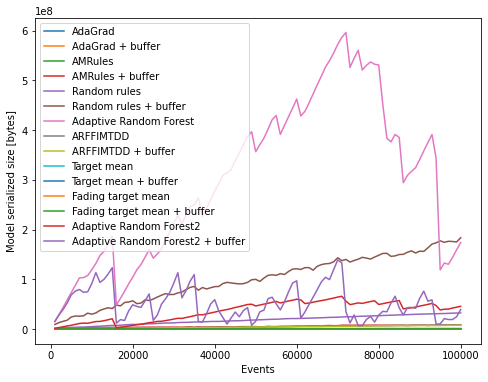

In [11]:
paths = [
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\adagrad.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\adagrad_buf.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\amrules.csv',
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\amrules_buf.csv', 

    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\random_rules.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\random_rules_buf.csv', 
    r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arf.csv', 
#     r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arf_buf.csv', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arffimtdd.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arffimtdd_buf.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\target_mean.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\target_mean_buf.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\fading_target_mean.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\fading_target_mean_buf.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arf.txt', 
         r'C:\Users\kosma\Desktop\MAGISTER\FeatExtream\runs\poc_generator\arf_buf.txt', 



]
labels = [
    'AdaGrad',   
    'AdaGrad + buffer',   
    'AMRules',  
    'AMRules + buffer', 
    'Random rules',   
    'Random rules + buffer',   
    'Adaptive Random Forest',  
        'ARFFIMTDD',   
    'ARFFIMTDD + buffer',   
    'Target mean',
    'Target mean + buffer',
    'Fading target mean',
    'Fading target mean + buffer',
    'Adaptive Random Forest2',
    'Adaptive Random Forest2 + buffer',

#     'Adaptive Random Forest + buffer',   
]
generate_matplotlib_graphs(paths, labels, './plots/poc_generator/poc_generator_')